In [20]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
#Reading the file
df = pd.read_csv(r"C:\Users\$hadow\Downloads\winequality.csv")

In [22]:
#shape of the dataframe
df.shape

(6497, 14)

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [24]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,white


In [25]:
#renaming column names
col_name = [col.replace(" ","_") for col in df.columns]
df.columns=col_name

In [26]:
#checking the missing values
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

In [27]:
#typecasting discrete numerical column to object type
df["quality"]=df["quality"].astype("object")
df["good"]=df["good"].astype("object")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  good                  6497 non-null   object 
 13  color                 6497 non-null   object 
dtypes: float64(11), object(3)
memory usage: 710.7+ KB


In [29]:
#dropping the duplicates from dataframe
df.drop_duplicates().shape

(5320, 14)

In [38]:
df = df.loc[df["alcohol"]>9.8]
df=df.loc[df["alcohol"]<11]

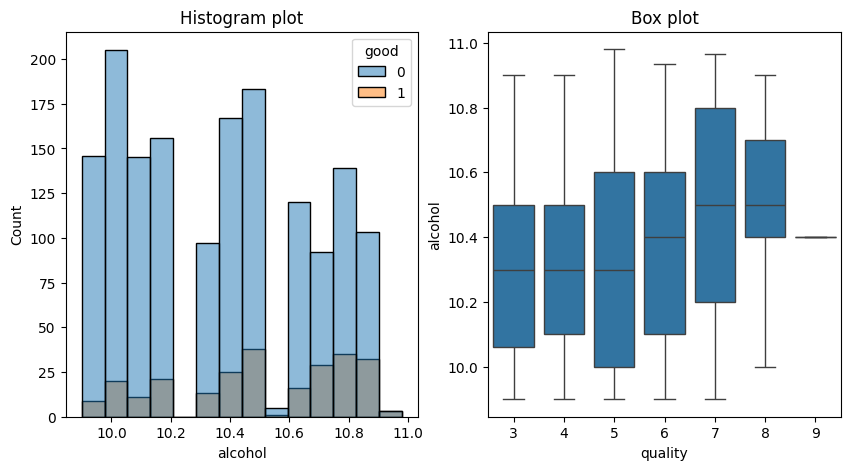

In [39]:
fig,axs =plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="alcohol",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "alcohol",ax=axs[1])

plt.show()

In [32]:
g = df.groupby("quality")

In [40]:
g["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,13.0,10.165385,0.400721,9.700000,9.8,10.1,10.5,10.900000
4,88.0,10.222727,0.341978,9.700000,10.0,10.2,10.5,10.900000
5,781.0,10.190862,0.367302,9.633333,9.9,10.1,10.5,10.980000
6,1083.0,10.298353,0.359625,9.700000,10.0,10.3,10.6,10.933333
7,255.0,10.450458,0.348937,9.700000,10.2,10.5,10.8,10.966667
8,23.0,10.413043,0.353302,9.800000,10.4,10.4,10.7,10.900000
9,1.0,10.400000,NaN,10.400000,10.4,10.4,10.4,10.400000


In [41]:
df =df.loc[df["pH"]<3.6]
df=df.loc[df["pH"]>2.8]

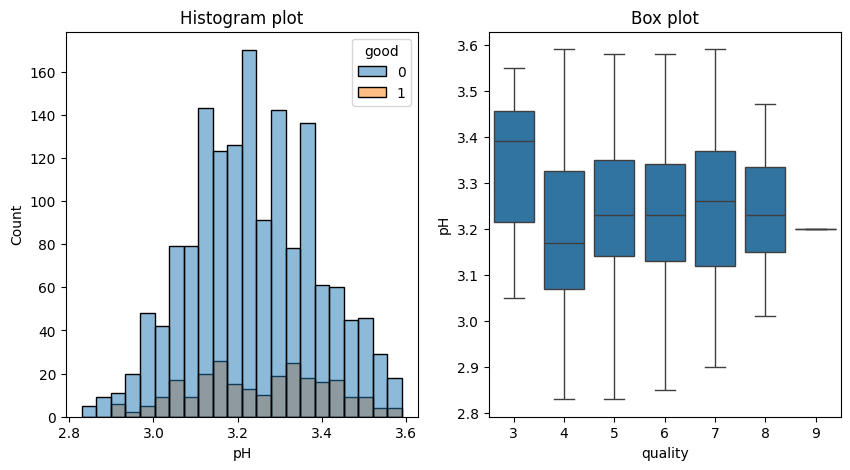

In [42]:
fig,axs=plt.subplots(1,2,figsize=(10,5))

axs[0].set_title("Histogram plot")
sns.histplot(data=df,x="pH",hue="good",ax=axs[0])

axs[1].set_title("Box plot")
sns.boxplot(data=df,x="quality",y = "pH",ax=axs[1])

plt.show()

In [43]:
g["pH"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,13.0,3.300769,0.215037,2.93,3.1400,3.32,3.44,3.63
4,88.0,3.226364,0.190674,2.83,3.0975,3.20,3.34,3.75
5,781.0,3.250192,0.165414,2.79,3.1400,3.24,3.36,3.79
6,1083.0,3.244589,0.158628,2.72,3.1300,3.23,3.36,3.81
7,255.0,3.262627,0.169554,2.90,3.1300,3.28,3.39,3.82
8,23.0,3.220870,0.142028,2.88,3.1500,3.22,3.33,3.47
9,1.0,3.200000,NaN,3.20,3.2000,3.20,3.20,3.20


<Axes: xlabel='density', ylabel='residual_sugar'>

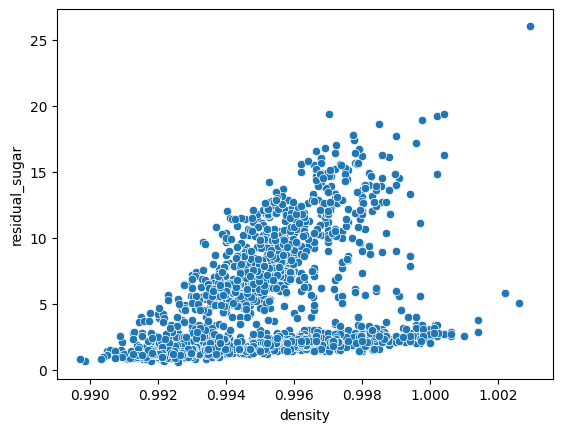

In [37]:
sns.scatterplot(data = df, x="density",y="residual_sugar")